## Notebook used to select samples 

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:

samples = pd.read_csv("oysters_files_names.csv", sep=";")
samples.head()
#file == sample file name; sample_id == name used in reporting

,file,sample_id
0,HCFKNDSX3_104762-001-002_23_TCTCGGTC-GATGTCAG_...,Oys-2016-02-E-S2
1,H7NKYDSX3_104762-001-003_26_CGTTACCA-TAGCGTTC_...,Oys-2019-02-A-S8
2,HCFKNDSX3_104762-001-002_84_AAGTAGAG-CAGTCGAT_...,Oys-2018-02-C-S6
3,HCFKNDSX3_104762-001-002_06_GAAGAAGT-GCTAATAG_...,Oys-2015-11-A-S1
4,HCFKNDSX3_104762-001-002_33_GACCGTTG-TGTGATGG_...,Oys-2016-11-F-S3


In [3]:
samples["sample_id"][8]

'Oys-2018-12-F-S7'

In [4]:
samples.shape

(336, 2)

In [5]:
sample_composition = pd.read_excel("top_species.oester.xlsx")
sample_composition.head()

,sample,family,species,Avg_fold,Covered_percent,reads_alignment,all_reads,cpm
0,Oys-2020-02-A-S10,Parvoviridae,Adeno-associated dependoparvovirus A,0.9203,15.0673,29,12797578,2.266054
1,Oys-2017-12-D-S5,Parvoviridae,Adeno-associated dependoparvovirus B,6.5806,58.7031,215,27253708,7.888835
2,Oys-2017-12-D-S5,Parvoviridae,Rodent protoparvovirus 1,0.1165,5.2437,4,27253708,0.146769
3,Oys-2017-12-D-S5,Parvoviridae,Adeno-associated dependoparvovirus A,0.0479,2.3937,2,27253708,0.073385
4,Oys-2021-02-B-S12,Parvoviridae,Adeno-associated dependoparvovirus B,0.2576,6.3335,8,16074044,0.497697


In [6]:
sample_composition.shape

(679, 8)

In [7]:
#group by samples and take the sum of each column
sample_group = sample_composition.groupby(by="sample")\
            [["Avg_fold","reads_alignment",\
              "Covered_percent", "cpm", "all_reads"]].apply(sum)

In [8]:
sample_group.head()

,Avg_fold,reads_alignment,Covered_percent,cpm,all_reads
sample,,,,,
Oys-2015-11-A-S1,0.0318,7.0,2.8439,0.339634,41220844.0
Oys-2015-11-D-S1,0.7193,46.0,2.5575,3.544212,25957816.0
Oys-2015-11-E-S1,0.0310,72.0,0.1399,5.453176,13203316.0
Oys-2015-11-F-S1,1.0064,138.0,5.2273,6.904272,59962878.0
Oys-2015-11-G-S1,32.8428,1063.0,98.3777,64.429319,82493500.0


In [9]:
#calculate the quantiles for based on coverage and fold
cov_q10 = sample_group.Covered_percent.quantile(0.1)
cov_q90 = sample_group.Covered_percent.quantile(0.85)

fold_q10 = sample_group.Avg_fold.quantile(0.1)
fold_q90 = sample_group.Avg_fold.quantile(0.85)

In [10]:
#select samples based the above quantiles
selected_samples = sample_group.query(f'Covered_percent > {cov_q90} & Avg_fold > {fold_q90} | \
                                        Covered_percent < {cov_q10} & Avg_fold < {fold_q10}')
selected_samples.head()

,Avg_fold,reads_alignment,Covered_percent,cpm,all_reads
sample,,,,,
Oys-2015-11-E-S1,0.0310,72.0,0.1399,5.453176,13203316.0
Oys-2015-11-G-S1,32.8428,1063.0,98.3777,64.429319,82493500.0
Oys-2015-11-I-S1,0.1221,256.0,0.7970,18.330028,13966154.0
Oys-2015-12-A-S1,25.9360,916.0,233.0970,36.608113,300261312.0
Oys-2016-02-D-S2,0.0142,30.0,0.1232,1.929861,15545162.0


<Axes: ylabel='sample'>

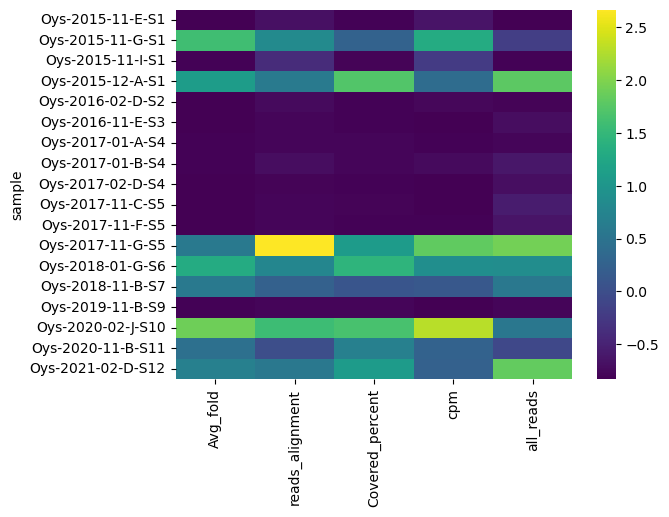

In [13]:
#not necessary
df_norm_col=(selected_samples-selected_samples.mean())/selected_samples.std()
sns.heatmap(df_norm_col, cmap='viridis')
#plt.show()

In [11]:
selected_samples_ids  = [i for i in selected_samples.index]
selected_samples_ids[0:5]

['Oys-2015-11-E-S1',
 'Oys-2015-11-G-S1',
 'Oys-2015-11-I-S1',
 'Oys-2015-12-A-S1',
 'Oys-2016-02-D-S2']

In [14]:
#write to file the composition of the selected samples
selected_sample_composition = sample_composition.query("sample in @selected_samples_ids")
selected_sample_composition.to_csv('selected_samples_oyster_composition.csv')

In [12]:
selected_sample_files = sorted(samples.query("sample_id in @selected_samples_ids")['file'])

In [33]:
selected_sample_files[0:5]

['H7NKYDSX3_104762-001-003_06_CCAGTTAG-ATGACAGG_L001_R1.fastq.gz',
 'H7NKYDSX3_104762-001-003_06_CCAGTTAG-ATGACAGG_L001_R2.fastq.gz',
 'H7NKYDSX3_104762-001-003_31_TCGCCTTG-GAATCAGC_L001_R1.fastq.gz',
 'H7NKYDSX3_104762-001-003_31_TCGCCTTG-GAATCAGC_L001_R2.fastq.gz',
 'H7NKYDSX3_104762-001-003_56_TTAATCAG-CAGATTGG_L001_R1.fastq.gz']

In [13]:
len(set(selected_sample_files))

36

In [21]:
raw_oesters = "/lustre/shared/wfsr-mcfa/projects/viral-metagenomics/reads/Oesters/"

homePath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/raw_data/oester_select/"

In [25]:
#Create a symlink to the selected samples
for sample in selected_sample_files:   
    if not os.path.exists(os.path.join(homePath,sample)):       
        os.symlink(os.path.join(raw_oesters,sample), os.path.join(homePath,sample))


In [32]:
#just test that we linked them properly
linkedsamples = os.listdir(homePath)
for x in linkedsamples:
    if x not in selected_sample_files:
        print(x) # if it prints something then i am in trouble :)

In [11]:
unclassifiedPath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/kraken2/results/unclassified/"

classifiedPath  = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/kraken2/results/"

In [33]:
unclassified = [ i.split(".")[0] for i in os.listdir(unclassifiedPath) ]

classified = []

for seq in os.listdir(classifiedPath):
    if seq.endswith('.html'):
       continue
    if not os.path.isdir(os.path.join(classifiedPath,seq)):
        #print(seq)
        #con
        sampleBase = seq.split(".")[0]
        #print(sampleBase)
        if sampleBase not in  unclassified:
            print(sampleBase)
            os.remove(os.path.join(classifiedPath,seq))

        

len(classified)

H3CK2DSX2_104453-001-023_TTAATCAG-CAGATTGG_L003
H3CK2DSX2_104453-001-007_GTCTGATG-TCGGATAT_L003
H3CK2DSX2_104453-001-006_TACTTAGC-TGGTACCT_L003
H3CK2DSX2_104453-001-012_ATTCCTCT-AATATCGC_L003
H3CK2DSX2_104453-001-027_CTAACTCG-GAACCATA_L003
H3CK2DSX2_104453-001-014_GCCGTCGA-GTGATTAA_L003
H3CK2DSX2_104453-001-006_TACTTAGC-TGGTACCT_L003
H3CK2DSX2_104453-001-008_TCTCGGTC-GATGTCAG_L003
H3CK2DSX2_104453-001-005_CCAGAGCT-GAAGTTCG_L003
H3CK2DSX2_104453-001-004_TCGCCTTG-GAATCAGC_L003
H3CK2DSX2_104453-001-022_CGCTATGT-TATGCGGA_L003
H3CK2DSX2_104453-001-021_TTGTCTAT-GATTCAAG_L003
H3CK2DSX2_104453-001-016_TAAGCACA-TTAATGTC_L003
H3CK2DSX2_104453-001-015_TATCCAGG-GAAGTGGA_L003
H3CK2DSX2_104453-001-020_ACAGTTGA-ATCGGAGC_L003
H3CK2DSX2_104453-001-003_AGGTTATC-GGTATGAT_L003
H3CK2DSX2_104453-001-024_CTATGCGT-TGATATTC_L003
H3CK2DSX2_104453-001-002_TTACGCAC-AGATGGTC_L003
H3CK2DSX2_104453-001-017_GTCCACAG-TATTCGCG_L003
H3CK2DSX2_104453-001-018_GACCTAAC-TGGTGAGC_L003
H3CK2DSX2_104453-001-019_AGCATGGA-TTAGCG

0

In [21]:
for i in classified:
    if i not in unclassified:
        print(i)


H3CK2DSX2_104453-001-006_TACTTAGC-TGGTACCT_L003


In [37]:
j = ["1", "2"]
x = f"classified_{j[0] or j[1]}"
print(x)

classified_1


In [1]:
import os

In [3]:
x = os.path.join('john', 'walked/', 'snakemake')
print(x)

john/walked/snakemake


In [20]:
metabat2Path = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/Oesters_results/metabat2"

samples = os.listdir(metabat2Path)
allPaths = [] 
for i in samples:    
    bins = os.listdir(os.path.join(metabat2Path, i))
    for bin in bins:
        #print(bin)
        allPaths.append(os.path.join(metabat2Path, i, bin))
print(allPaths)

with open('./allcontigPaths.txt', 'w') as fn:
    for path in allPaths:        
        fn.write(f'{path}\t')    

['/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/Oesters_results/metabat2/HCFKNDSX3_104762-001-002_47_GAAGGAAG-CCAGGATG_L004/metabat2_bin.tooShort.fa', '/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/Oesters_results/metabat2/HCFKNDSX3_104762-001-002_47_GAAGGAAG-CCAGGATG_L004/metabat2_bin.unbinned.fa', '/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/Oesters_results/metabat2/HCFKNDSX3_104762-001-002_44_TTAATCAG-CAGATTGG_L004/metabat2_bin.tooShort.fa', '/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/Oesters_results/metabat2/HCFKNDSX3_104762-001-002_44_TTAATCAG-CAGATTGG_L004/metabat2_bin.unbinned.fa', '/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/Oesters_results/metabat2/HCFKNDSX3_104762-001-002_03_TAATGAAC-AAGCCAAG_L004/metabat2_bin.tooShort.fa', '/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/Oest

### Analyse Checkv Quality Report

In [2]:
import pandas as pd
checkvReportDir_viral = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/checkv" #HCFKNDSX3_104762-001-002_44_TTAATCAG-CAGATTGG_L004/quality_summary.tsv"


checkvReportDir_host_removed = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/checkv/host_removed"# HCFKNDSX3_104762-001-002_44_TTAATCAG-CAGATTGG_L004/quality_summary.tsv"
# checkvReport_viral_only = pd.read_csv(checkvReportDir_viral, sep="\t")
# checkvReport_host_removed = pd.read_csv(checkvReportDir_host_removed , sep="\t")



In [4]:


def get_mean_contig_len(checkv_dir):
    
    mean_contig_length = []
    all_quality = []
    for sample in os.listdir(checkv_dir):
        
        
        ignore_dir = ['checkv-db-v1.5', "host_removed"]
        
        if sample in  ignore_dir:
            continue
        #print(dir)

        # read in the checkv quality report
        checkv_df = pd.read_csv(os.path.join(checkv_dir, sample, "quality_summary.tsv"), sep="\t")
        
        # pick the sample mean contig len
        sample_mean_contig_length = checkv_df['contig_length'].mean()
        mean_contig_length.append(sample_mean_contig_length)

        #pick the number of medium to complete genomes
        sample_quality = checkv_df.query("checkv_quality == 'Medium-quality' | checkv_quality == 'High-quality' | \
        checkv_quality == 'Complete'").shape[0]

        all_quality.append(sample_quality)

                                                                
        
        #print(sample, sample_quality)

        

    return mean_contig_length, all_quality
    #break







In [7]:
# how many contigs were longer than 2kb?
def get_num_over2kb_contigs(checkv_dir):
    
    over2kb = []
    for sample in os.listdir(checkv_dir):
        
        
        ignore_dir = ['checkv-db-v1.5', "host_removed"]
        
        if sample in  ignore_dir:
            continue
        #print(dir)

        # read in the checkv quality report
        checkv_df = pd.read_csv(os.path.join(checkv_dir, sample, "quality_summary.tsv"), sep="\t")
        
        # pick the numbe of contigs >= 2kb
        sample_over2kb = checkv_df.query("contig_length >= 2000").shape[0]

        over2kb.append(sample_over2kb)

                                                                
        
        #print(sample, sample_quality)

        

    return over2kb

In [5]:
viral_only_contig_len, viral_good_quality = get_mean_contig_len(checkvReportDir_viral)

host_removed_contig_len, host_removed_good_quality = get_mean_contig_len(checkvReportDir_host_removed)

In [11]:
over2kb_viral_only = get_num_over2kb_contigs(checkvReportDir_viral)
sum(ver2kb_viral_only)

27

In [13]:
over2kb_host_removed = get_num_over2kb_contigs(checkvReportDir_host_removed)
sum(over2kb_host_removed)

1879

In [14]:

contigs_len = pd.DataFrame({
    'viral_only': viral_only_contig_len,
    'host_removed': host_removed_contig_len
})
contigs_len.head()

,viral_only,host_removed
0,414.753247,391.512302
1,394.033898,376.342349
2,422.720670,378.341553
3,431.631902,406.481628
4,430.351648,413.233874


In [26]:
#what is the mean of contig lens
viral_only_average_len = contigs_len['viral_only'].mean()
host_excluded_average_len =  contigs_len['host_removed'].mean()
print(f'viral only average length: {viral_only_average_len}\n \
      Host exclusion average length: {host_excluded_average_len}')

viral only average length: 402.73325919134635
       Host exclusion average length: 398.6607148348568


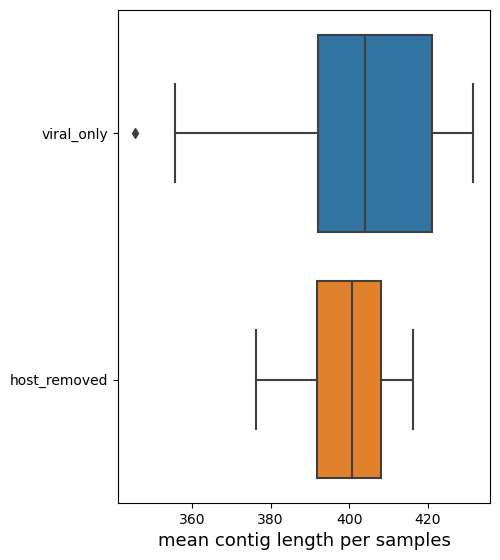

In [24]:
#plot the mean contig len
plt.figure(figsize=(4.8,6.4),dpi=100)
ax = sns.boxplot(data=contigs_len, orient='h',
             showmeans = False)#palette= [sns.color_palette("colorblind")[6],sns.color_palette("colorblind")[5]],


plt.xlabel('mean contig length per samples', fontsize=13)
plt.savefig('./report_figures/mean_contig_len.png',format='png',
           transparent=False,bbox_inches = 'tight')
plt.show()

In [75]:
good_quality = pd.DataFrame({
    'viral_only': viral_good_quality,
    'host_removed': host_removed_good_quality
})
good_quality.head()

,viral_only,host_removed
0,0,8
1,0,23
2,2,23
3,0,56
4,0,46


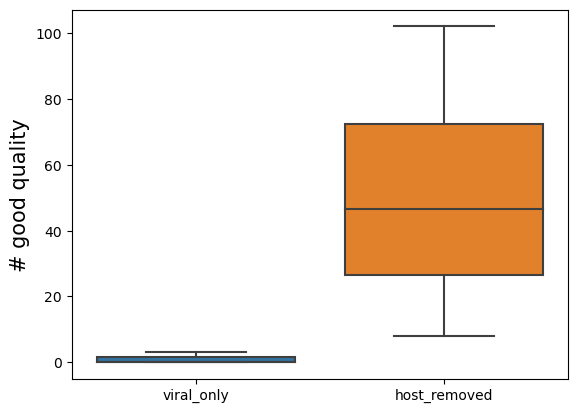

In [81]:
plt.figure(figsize=(6.4,4.8),dpi=100)
ax = sns.boxplot(data=good_quality, 
             showmeans = False)#palette= [sns.color_palette("colorblind")[6],sns.color_palette("colorblind")[5]],


plt.ylabel('# good quality', fontsize=15)
plt.savefig('./report_figures/good_contigs.png',format='png',
           transparent=False,bbox_inches = 'tight')
plt.show()

In [18]:
checkvReport_viral_only['contig_length'].mean()

394.03389830508473

In [7]:
checkvReport_host_removed['contig_length'].mean()

376.3423492063492

In [53]:
highQuality = checkvReport_viral_only.query("checkv_quality == 'Medium-quality' | checkv_quality == 'High-quality' | \
checkv_quality == 'Complete'")
highQuality.shape



(0, 14)

In [55]:
highQuality_host_removed = checkvReport_host_removed.query("checkv_quality == 'Medium-quality' | checkv_quality == 'High-quality'")
highQuality_host_removed.shape

(0, 14)

In [22]:
highQuality_host_removed.shape

(23, 14)

In [13]:
# completeness = checkvReport_viral_only.query("completeness > @completeness_cutoff")

# completeness.shape

### Concatenate Fasta Files While tracking samples

In [34]:
metaspadesPath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/Oesters_results/metaspades"

#pick samples from metaspades directory
samples = os.listdir(metaspadesPath)


# assign samples id to shorten their names
samplesIDs = {}
for index, sample in enumerate(samples):
    samplesIDs[f'sample_{index + 1}']= sample
with open("./allContigsk127_IDs_anotation.txt", "w") as txt:
    txt.write(str(samplesIDs))

#rename all contig headers to sample_id_original_contig_name
with open("./allContigsk127.fasta", "w") as fn:
    for id,  sample in zip(samplesIDs.keys(), samples):
        contigPath = os.path.join(metaspadesPath, sample, "contigs.fasta")

        with open(contigPath, "r") as contigs:
            for line in contigs:                
                if line.startswith(">"):
                    #print(line)

                    newHeader = line.replace(line, f'>{id}_{line[1:]}') # replace the header with sample info
                    # print(newHeader)
                    fn.write(newHeader)
                else:
                    fn.write(line)
                    
        
        
        #break
   
    

In [30]:
samplesIDs

{'sample_1': 'HCFKNDSX3_104762-001-002_47_GAAGGAAG-CCAGGATG_L004',
 'sample_2': 'HCFKNDSX3_104762-001-002_44_TTAATCAG-CAGATTGG_L004',
 'sample_3': 'HCFKNDSX3_104762-001-002_03_TAATGAAC-AAGCCAAG_L004',
 'sample_4': 'HCFKNDSX3_104762-001-002_35_AGGTGCGA-GCCAGAAG_L004',
 'sample_5': 'HCFKNDSX3_104762-001-002_63_TCGCTAGA-GCAGTACT_L004',
 'sample_6': 'HCFKNDSX3_104762-001-002_64_AACGCATT-CAACCTGC_L004',
 'sample_7': 'H7NKYDSX3_104762-001-003_56_TTAATCAG-CAGATTGG_L001',
 'sample_8': 'H7NKYDSX3_104762-001-003_31_TCGCCTTG-GAATCAGC_L001',
 'sample_9': 'HCFKNDSX3_104762-001-002_53_TCTGCAAG-AAGGTGAA_L004',
 'sample_10': 'HCFKNDSX3_104762-001-002_14_CGTTACCA-TAGCGTTC_L004',
 'sample_11': 'HCFKNDSX3_104762-001-002_12_GAACCTAG-AATACCAG_L004',
 'sample_12': 'H7NKYDSX3_104762-001-003_06_CCAGTTAG-ATGACAGG_L001',
 'sample_13': 'H7NKYDSX3_104762-001-003_57_CTATGCGT-TGATATTC_L001',
 'sample_14': 'H7NKYDSX3_104762-001-003_81_GCCGTCGA-GTGATTAA_L001',
 'sample_15': 'HCFKNDSX3_104762-001-002_09_CATGATCG-GGAGA

### Analyse DeepvirFinder  Viral Prediction Report

In [46]:
deepvirfinderReportPath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/Oesters_results/deepvirfinder/allContigsk127.fasta_gt1bp_dvfpred.txt"

In [48]:
deepvirfinderReport = pd.read_csv(deepvirfinderReportPath, sep="\t")

deepvirfinderReport.head()

,name,len,score,pvalue
0,sample_1_NODE_7_length_384_cov_1.883268,384,0.843494,0.035081
1,sample_2_NODE_1_length_470_cov_146.110787,470,0.069547,0.493732
2,sample_2_NODE_3_length_417_cov_1.268966,417,0.973227,0.010309
3,sample_1_NODE_1_length_547_cov_43.790476,547,0.548903,0.111150
4,sample_1_NODE_17_length_202_cov_13.173333,202,0.346634,0.344039


In [62]:
highconf_viruses = deepvirfinderReport.query("score > 0.90")
highconf_viruses.shape # might be interesting to test the influenec of sequence lenght on the confidence score.

(311, 4)

### Analyse Genomad Taxonomy assignment

In [26]:
genomadReportPath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/genomad/host_removed"
total_viruses = []
samples = []

for sample in os.listdir(genomadReportPath):
    if sample.startswith("all"):
        continue
    report_df = pd.read_csv(os.path.join(genomadReportPath, sample,"checkv_medium_to_high_contigs_summary",
                                         "checkv_medium_to_high_contigs_virus_summary.tsv"), sep="\t")
    
    total_viruses.append(report_df.query("virus_score > 0.7").shape[0])
    samples.append(sample)



viruses_df = pd.DataFrame({
    "sample": samples,
    "genomad viruses":total_viruses
})

viruses_df.to_csv(os.path.join(genomadReportPath, "genomad_and_blast_sample_viruse.csv"))

In [3]:
genomadReport = pd.read_csv(genomadReportPath, sep="\t")
genomadReport.head()

,seq_name,length,topology,coordinates,n_genes,genetic_code,virus_score,fdr,n_hallmarks,marker_enrichment,taxonomy
0,sample_12_NODE_1_length_8862_cov_17220.400687,8862,No terminal repeats,NaN,3,11,0.9815,NaN,2,5.1548,Viruses;Riboviria;Orthornavirae;Pisuviricota;P...
1,sample_9_NODE_1_length_644_cov_49.566731,644,No terminal repeats,NaN,1,11,0.9759,NaN,1,1.5528,Viruses;Monodnaviria;Sangervirae;Phixviricota;...
2,sample_2_NODE_10_length_363_cov_25.940678,363,No terminal repeats,NaN,1,11,0.9755,NaN,1,1.5528,Viruses;Monodnaviria;Sangervirae;Phixviricota;...
3,sample_12_NODE_2_length_1144_cov_113.105211,1144,No terminal repeats,NaN,1,11,0.9753,NaN,1,1.7183,Viruses;Riboviria;Orthornavirae;Pisuviricota;P...
4,sample_11_NODE_2_length_2052_cov_62.356364,2052,No terminal repeats,NaN,1,11,0.9748,NaN,1,1.7183,Viruses;Riboviria;Orthornavirae;Kitrinoviricot...


In [60]:
genomad_highconf_viruses = genomadReport.query("virus_score > 0.9")
genomad_highconf_viruses.shape

(391, 11)

### VAMB clusters

In [2]:
clustersPath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/Oesters_results/vamb/bins/clusters.tsv"

In [7]:
vambClusters = pd.read_csv(clustersPath, sep="\t", header=None)
vambClusters.head()


,0,1
0,1,sample_14_NODE_68_length_374_cov_54.550607
1,1,sample_16_NODE_84_length_305_cov_73.292135
2,1,sample_16_NODE_95_length_283_cov_119.282051
3,1,sample_14_NODE_71_length_372_cov_58.767347
4,1,sample_11_NODE_223_length_214_cov_99.126437


In [14]:
vambClusters.rename(columns={0:'bin_ID', 1:'contig_name'}, inplace=True)
vambClusters.query('bin_ID == 46')

,bin_ID,contig_name
132,46,sample_12_NODE_187_length_205_cov_1189.743590
133,46,sample_12_NODE_207_length_174_cov_3.191489
134,46,sample_12_NODE_1_length_8862_cov_17220.400687
135,46,sample_12_NODE_189_length_202_cov_4.693333
136,46,sample_12_NODE_119_length_326_cov_11.467337
137,46,sample_12_NODE_190_length_200_cov_1032.465753
138,46,sample_12_NODE_151_length_291_cov_22.121951
139,46,sample_12_NODE_205_length_177_cov_25.680000
140,46,sample_12_NODE_202_length_181_cov_278.666667
141,46,sample_12_NODE_80_length_377_cov_28.776000


In [19]:
vambClusters.shape

(2219, 2)

## Viruses Associated with human host

In [27]:
hostDbPath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/scripts/virushostdb.tsv"

In [28]:
hostdb_viruses = pd.read_csv(hostDbPath, sep="\t", usecols=['virus tax id', "refseq id", "virus lineage", "host name", "DISEASE"])
hostdb_viruses.head(10)

,virus tax id,virus lineage,refseq id,DISEASE,host name
0,46350,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,NC_001729,NaN,Homo sapiens
1,57579,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,NC_001829,NaN,Macaca mulatta
2,57579,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,NC_001829,NaN,Homo sapiens
3,57579,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,NC_001829,NaN,Chlorocebus sabaeus
4,68558,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,AF028704,NaN,Homo sapiens
5,10804,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,NC_001401,NaN,Homo sapiens
6,10804,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,NC_001401,NaN,Mammalia
7,68742,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,AF028705,NaN,Homo sapiens
8,82300,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,NC_006152,NaN,Homo sapiens
9,335103,Viruses; Riboviria; Orthornavirae; Duplornavir...,"NC_007548, NC_007549, NC_007550, NC_007551, NC...",NaN,Homo sapiens


In [64]:
#select only viruses with human host
hostdb_viruses.query(" `host name` == 'Homo sapiens'", inplace= True)
hostdb_viruses.head()



,virus tax id,virus lineage,refseq id,DISEASE,host name
0,46350,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,NC_001729,NaN,Homo sapiens
2,57579,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,NC_001829,NaN,Homo sapiens
4,68558,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,AF028704,NaN,Homo sapiens
5,10804,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,NC_001401,NaN,Homo sapiens
7,68742,Viruses; Monodnaviria; Shotokuvirae; Cossaviri...,AF028705,NaN,Homo sapiens


In [72]:
blastout = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/checkv/host_removed/HCFKNDSX3_104762-001-002_44_TTAATCAG-CAGATTGG_L004/checkv_medium_to_high_blast_test.txt"
detectedViruses = pd.read_csv(blastout,    sep="\t", header=None)
detectedViruses.rename( columns={0:'contig name', 1:'taxid', 2: "sacc", 3: "sscinames", 4:"sblastnames", 5:"evalue", 6:"bitscore", 7:"pident"}, inplace=True)

# keep only one hit per contig (query) based on eval, bit score and  percent identity
detectedViruses.sort_values(["contig name", "pident", "evalue", "bitscore"], ascending= [True, False, True, False], inplace=True)
detectedViruses.drop_duplicates(subset=['contig name'], keep='first', inplace=True)
detectedViruses.sort_index(inplace=True)
detectedViruses.head(20) 

,contig name,taxid,sacc,sscinames,sblastnames,evalue,bitscore,pident
1,NODE_1_length_10532_cov_285.994810,29159,XM_011415281,Crassostrea gigas,bivalves,1.500000e+00,52.8,100.000
11,NODE_2_length_7700_cov_406.999868,11978,M86379,Feline calicivirus,viruses,8.200000e-07,73.1,100.000
28,NODE_4_length_4017_cov_182.179177,1940570,MW348569,Parvoviridae sp.,viruses,1.600000e-155,566.0,74.943
29,NODE_5_length_3448_cov_97.686239,246410,XM_001240667,Coccidioides immitis RS,ascomycete fungi,4.800000e-01,52.8,100.000
32,NODE_7_length_3159_cov_29.293206,186617,JX904654,uncultured marine virus,viruses,1.980000e-14,97.1,84.694
34,NODE_13_length_2673_cov_133.439120,29159,LR761639,Crassostrea gigas,bivalves,1.000000e-01,54.7,100.000
35,NODE_38_length_1701_cov_29.395807,1954248,MT208579,Circoviridae sp.,viruses,3.860000e-04,62.1,87.037
38,NODE_52_length_1503_cov_82.534884,2202954,MH618202,Circular genetic element sp.,viruses,1.110000e-68,276.0,83.117
42,NODE_61_length_1468_cov_163.879195,988011,OX411766,Orthosia incerta,moths,2.000000e-01,52.8,96.774
45,NODE_100_length_1306_cov_35.586938,1954248,MH617385,Circoviridae sp.,viruses,4.900000e-02,54.7,100.000


In [71]:
#select only viruses with human host
hostdb_viruses.query(" `host name` == 'Homo sapiens'", inplace= True)
human_viruses_taxids = [x for x in hostdb_viruses['virus tax id'] ]
human_viruses_refseq1ds = [x for x in hostdb_viruses["refseq id"] ] # MY BLAST DOESNT have refseqid; currently using subject accession number


 # select human viruses
human_viruses_per_bin = detectedViruses.query("taxid.isin(@human_viruses_taxids) | \
                                                sacc.isin(@human_viruses_refseq1ds)") #find common taxid or common refseq id. THERE DIFF BTWN refseq & ACCESSion NUM
        

human_viruses_per_bin

,contig name,taxid,sacc,sscinames,sblastnames,evalue,bitscore,pident


## Create a report of human viruses detected in our dataset

In [66]:
#load host db viruses
hostDbPath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/scripts/virushostdb.tsv"
hostdb_viruses = pd.read_csv(hostDbPath, sep="\t", usecols=['virus tax id', "refseq id", "virus lineage", "host name", "DISEASE"])

#select only viruses with human host
hostdb_viruses.query(" `host name` == 'Homo sapiens'", inplace= True)
human_viruses_taxids = [x for x in hostdb_viruses['virus tax id'] ]
human_viruses_refseq1ds = [x for x in hostdb_viruses["refseq id"] ] # MY BLAST DOESNT have refseqid; currently using subject accession number

#Initiate empty dataframe to be filled with human viruses detected in our dataset and also one with all detected viruses
all_detected_human_viruses = pd.DataFrame(columns=[ 'contig name', 'taxid', "sacc", "sscinames", "sblastnames", "evalue", "bitscore","pident", "sample"])
all_detected_viruses = pd.DataFrame(columns=[ 'contig name', 'taxid', "sacc", "sscinames", "sblastnames", "evalue", "bitscore","pident", "sample"])


detectedVirusesPath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/blast/host_removed"
samples = []
num_viruses = []
for file in os.listdir(detectedVirusesPath):
    if file.endswith(".txt"):   
        continue     
    file_size = os.path.getsize(os.path.join(f'{detectedVirusesPath}',f'{file}', "blastn_search.tsv"))
    
    if  file_size == 0:
        continue
    
    
    detectedViruses = pd.read_csv(os.path.join(f'{detectedVirusesPath}',f'{file}', "blastn_search.tsv"), sep="\t", header=None)
    detectedViruses.rename( columns={0:'contig name', 1:'taxid', 2: "sacc", 3: "sscinames", 4:"sblastnames", 5:"evalue", 6:"bitscore", 7:"pident"}, inplace=True)
        
    # keep only one hit per contig (query) based on eval, bit score and  percent identity: this could lead to missing other closely similar sequences
    detectedViruses.sort_values(["contig name", "bitscore","pident", "evalue"], ascending= [True, False, False, True], inplace=True)
    detectedViruses.drop_duplicates(subset=['contig name'], keep='first', inplace=True)
    detectedViruses.sort_index(inplace=True)
        
    #add a column with sample info
    detectedViruses["sample"] = file
    #detectedViruses = detectedViruses.query("bitscore > 100")
    #merge all viruses
    all_detected_viruses = pd.concat([all_detected_viruses, detectedViruses])

    # select human viruses
    human_viruses_per_sample = detectedViruses.query("taxid.isin(@human_viruses_taxids) | \
                                                    sacc.isin(@human_viruses_refseq1ds)") #find common taxid or common refseq id. THERE DIFF BTWN refseq & ACCESSion NUM
    
    #check how many are viruses for comparison genomad
    viruses_only = detectedViruses.query("sblastnames == 'viruses'").shape[0]
    num_viruses.append(viruses_only)
    samples.append(file)
    #print(file, detectedViruses.shape)
    
    #merge with human viruses for all bins
    all_detected_human_viruses = pd.concat([all_detected_human_viruses, human_viruses_per_sample])

#creat a df tracking the number of viruses per sample
blast_num_viruses = pd.DataFrame({
    "sample": samples,
    "blast viruses": num_viruses})

#merge blast viruses with genomad viruses
genomad_blast_viruses = viruses_df.merge(blast_num_viruses, on="sample")
genomad_blast_viruses.to_csv(os.path.join(genomadReportPath, "genomad_and_blast_sample_viruse.csv"))
# write out to file 
# all_detected_human_viruses.to_csv(os.path.join(f'{detectedVirusesPath}', "bitscoreFiltered_host_removed_detected_human_viruses_binsize_1000.txt"), sep='\t', columns=all_detected_human_viruses.columns)
# all_detected_viruses.to_csv(os.path.join(f'{detectedVirusesPath}', "bitscoreFiltered_host_removed_all_detected_viruses_binsize_1000.txt"), sep='\t', columns=all_detected_human_viruses.columns)


HCFKNDSX3_104762-001-002_47_GAAGGAAG-CCAGGATG_L004 (4, 9)
HCFKNDSX3_104762-001-002_44_TTAATCAG-CAGATTGG_L004 (6, 9)
HCFKNDSX3_104762-001-002_03_TAATGAAC-AAGCCAAG_L004 (10, 9)
HCFKNDSX3_104762-001-002_35_AGGTGCGA-GCCAGAAG_L004 (22, 9)
HCFKNDSX3_104762-001-002_63_TCGCTAGA-GCAGTACT_L004 (13, 9)
HCFKNDSX3_104762-001-002_64_AACGCATT-CAACCTGC_L004 (10, 9)
H7NKYDSX3_104762-001-003_56_TTAATCAG-CAGATTGG_L001 (23, 9)
H7NKYDSX3_104762-001-003_31_TCGCCTTG-GAATCAGC_L001 (21, 9)
HCFKNDSX3_104762-001-002_53_TCTGCAAG-AAGGTGAA_L004 (19, 9)
HCFKNDSX3_104762-001-002_14_CGTTACCA-TAGCGTTC_L004 (10, 9)
HCFKNDSX3_104762-001-002_12_GAACCTAG-AATACCAG_L004 (27, 9)
H7NKYDSX3_104762-001-003_06_CCAGTTAG-ATGACAGG_L001 (36, 9)
H7NKYDSX3_104762-001-003_57_CTATGCGT-TGATATTC_L001 (14, 9)
H7NKYDSX3_104762-001-003_81_GCCGTCGA-GTGATTAA_L001 (16, 9)
HCFKNDSX3_104762-001-002_09_CATGATCG-GGAGAGTA_L004 (28, 9)
HCFKNDSX3_104762-001-002_71_TAAGCACA-TTAATGTC_L004 (10, 9)
HCFKNDSX3_104762-001-002_57_ATTATCAA-GAGAGTCG_L004 (6, 9)


In [65]:
#all_detected_human_viruses.drop(columns=['subject_id'], inplace=True) #this col is not helpful i drop it
all_detected_human_viruses.head()

,contig name,taxid,sacc,sscinames,sblastnames,evalue,bitscore,pident,sample
69,NODE_164_length_1860_cov_96.292556,743300,NC_038392,Human stool-associated circular virus NG13,viruses,0.000033,65.8,100.0,H7NKYDSX3_104762-001-003_31_TCGCCTTG-GAATCAGC_...
22,NODE_33_length_1738_cov_11.656735,743300,NC_038392,Human stool-associated circular virus NG13,viruses,0.000030,65.8,100.0,HCFKNDSX3_104762-001-002_57_ATTATCAA-GAGAGTCG_...


In [61]:
all_detected_viruses.shape

(279, 9)

### High confidence viruses

In [62]:
highconf_viruses = all_detected_viruses.query("bitscore > 100")
highconf_viruses.shape


(204, 9)

In [63]:
highconf_viruses.head(40)

,contig name,taxid,sacc,sscinames,sblastnames,evalue,bitscore,pident,sample
8,NODE_2_length_7715_cov_668.847654,11978,M86379,Feline calicivirus,viruses,0.000000e+00,14022.0,99.622,HCFKNDSX3_104762-001-002_47_GAAGGAAG-CCAGGATG_...
26,NODE_16_length_2179_cov_20.280702,2202644,MH572379,Microviridae sp.,viruses,0.000000e+00,2715.0,98.882,HCFKNDSX3_104762-001-002_47_GAAGGAAG-CCAGGATG_...
32,NODE_64_length_1318_cov_46.818640,186617,JX904221,uncultured marine virus,viruses,1.680000e-46,202.0,73.623,HCFKNDSX3_104762-001-002_47_GAAGGAAG-CCAGGATG_...
10,NODE_2_length_7700_cov_406.999868,11978,M86379,Feline calicivirus,viruses,0.000000e+00,14017.0,99.609,HCFKNDSX3_104762-001-002_44_TTAATCAG-CAGATTGG_...
28,NODE_4_length_4017_cov_182.179177,1940570,MW348569,Parvoviridae sp.,viruses,1.600000e-155,566.0,74.943,HCFKNDSX3_104762-001-002_44_TTAATCAG-CAGATTGG_...
2,NODE_12_length_3121_cov_67.770541,2021905,MF189995,Barns Ness breadcrumb sponge tombus-like virus 4,viruses,0.000000e+00,2124.0,97.138,HCFKNDSX3_104762-001-002_03_TAATGAAC-AAGCCAAG_...
11,NODE_13_length_3059_cov_80.190314,1922696,KX882788,Beihai sobemo-like virus 24,viruses,0.000000e+00,2213.0,80.773,HCFKNDSX3_104762-001-002_03_TAATGAAC-AAGCCAAG_...
15,NODE_14_length_3058_cov_135.407711,1922709,KX883027,Beihai sphaeromadae virus 3,viruses,0.000000e+00,3500.0,87.492,HCFKNDSX3_104762-001-002_03_TAATGAAC-AAGCCAAG_...
21,NODE_15_length_2964_cov_54.477617,1922355,KX883036,Beihai barnacle virus 11,viruses,0.000000e+00,4695.0,95.302,HCFKNDSX3_104762-001-002_03_TAATGAAC-AAGCCAAG_...
28,NODE_16_length_2963_cov_76.013752,2583950,MZ218514,Tombusviridae sp.,viruses,0.000000e+00,662.0,72.609,HCFKNDSX3_104762-001-002_03_TAATGAAC-AAGCCAAG_...


### Sequences labled as non-viral by BLAST

In [64]:
blast_non_viruses = highconf_viruses.query("sblastnames != 'viruses'")
blast_non_viruses.shape

(0, 9)

In [196]:
blast_non_viruses.head(40)

,contig name,taxid,sacc,sscinames,sblastnames,evalue,bitscore,pident,sample


In [449]:
#1955153 in human_viruses_taxids
import collections
all = [x for x in   all_detected_viruses["taxid"]]

#human_viruses_taxids
list(set(all) & set(human_viruses_taxids))



[256548, 1313215]

### Sourmash Report

In [2]:
report = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/scripts/sourmash_test.gather.k31.summarized.csv"

sourmash_df = pd.read_csv(report)
sourmash_df.drop(columns=["query_filename"], inplace=True)
sourmash_df

,query_name,rank,fraction,lineage,query_md5,f_weighted_at_rank,bp_match_at_rank,query_ani_at_rank,total_weighted_hashes
0,NaN,superkingdom,0.052632,Viruses,439b50c9,0.05,2000,0.909389,40
1,NaN,superkingdom,0.947368,unclassified,439b50c9,0.95,36000,NaN,40
2,NaN,phylum,0.052632,Viruses;Pisuviricota,439b50c9,0.05,2000,0.909389,40
3,NaN,phylum,0.947368,unclassified,439b50c9,0.95,36000,NaN,40
4,NaN,class,0.052632,Viruses;Pisuviricota;Pisoniviricetes,439b50c9,0.05,2000,0.909389,40
5,NaN,class,0.947368,unclassified,439b50c9,0.95,36000,NaN,40
6,NaN,order,0.052632,Viruses;Pisuviricota;Pisoniviricetes;Picornavi...,439b50c9,0.05,2000,0.909389,40
7,NaN,order,0.947368,unclassified,439b50c9,0.95,36000,NaN,40
8,NaN,family,0.052632,Viruses;Pisuviricota;Pisoniviricetes;Picornavi...,439b50c9,0.05,2000,0.909389,40
9,NaN,family,0.947368,unclassified,439b50c9,0.95,36000,NaN,40


In [8]:
sourmash = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/sourmash/output.sourmash-profiling/2-gather/H7NKYDSX3_104762-001-003_06_CCAGTTAG-ATGACAGG_L001.k51.gather.csv"

In [60]:
#link genbank to taxids
sourmashPath ="/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/sourmash/output.sourmash-profiling/2-gather/"

lineagesPath ="/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/tools/pb-metagenomics-tools/Taxonomic-Profiling-Sourmash/databases/"

genbank_tax = pd.DataFrame(columns=["ident","taxid"])
for file in os.listdir(lineagesPath):
   if file.endswith(".lineages.csv.gz"):
      #print(file)
      tax = pd.read_csv(os.path.join(lineagesPath,file), usecols=["ident","taxid"])
      genbank_tax = pd.concat([genbank_tax,tax])
   #break

#genbank_tax_vir = pd.read_csv(genbank_tax_path, usecols=["ident","taxid"])

sourmash_viruses =pd.DataFrame(columns=["taxid", "genbank_id", "name", "sample"])
for file in os.listdir(sourmashPath):   
   if file.endswith(".k51.gather.csv"):
      sourmash_viruses_per_sample =pd.DataFrame(columns=["taxid","posible_FN","genbank_id", "name", "sample"])

      #print(file)
      sample = file.split(".")[0]
      #print(sample)
    
      #extract genbank identifiers for sourmash hits
      sourmash_gather = pd.read_csv(os.path.join(sourmashPath,file))
      genbank_name = [x for x in  sourmash_gather['name']]
      #print(genbank_name)
      #break

      genbank_ids = []
      names =[]
      FNs = []
      for species_name in genbank_name:
         
         genbank_id =  species_name.split(",")[0].split(" ")[0] # extract the genbank id 
         name1 = species_name.split(",")[0].split(" ")[1] # extract the genbank name
         name2 = species_name.split(",")[0].split(" ")[2]
         name = f"{name1} {name2}"
         posible_FP = species_name.split(",")[1]
         # print(name, genbank_id,posible_FP)
         
         genbank_ids.append((genbank_id))
         names.append(name)
         FNs.append(posible_FP)
      # print(names, genbank_ids,FNs)
      

      genbank_tax_id = [x for x in genbank_tax.query("ident.isin(@genbank_ids)")['taxid']]
      
      #print(genbank_tax_id)

      #add to the df per sample
      sourmash_viruses_per_sample["taxid"] = genbank_tax_id
      sourmash_viruses_per_sample["genbank_id"] = genbank_ids
      sourmash_viruses_per_sample["posible_FN"] = FNs
      sourmash_viruses_per_sample["name"] = names
      sourmash_viruses_per_sample["sample"] = sample


      sourmash_viruses = pd.concat([sourmash_viruses,sourmash_viruses_per_sample])




      #break

      

In [69]:
sourmash_viruses.to_csv("sourmash_viruses.tsv",sep='\t', columns=sourmash_viruses.columns)

In [67]:

#load host db viruses
hostDbPath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/scripts/virushostdb.tsv"
hostdb_viruses = pd.read_csv(hostDbPath, sep="\t", usecols=['virus tax id', "refseq id", "virus lineage", "host name", "DISEASE"])

#select only viruses with human host
hostdb_viruses.query(" `host name` == 'Homo sapiens'", inplace= True)
human_viruses_taxids = [x for x in hostdb_viruses['virus tax id'] ]



In [68]:
sourmash_viruses.query("taxid.isin(@human_viruses_taxids)")

,taxid,genbank_id,name,sample,posible_FN


In [73]:
#how many unique taxids
len(set(sourmash_viruses["taxid"]))

8

In [2]:
genbank_linPath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/tools/databases/genbank-2022.03-viral.lineages.csv"
krakentaxidPath ="/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/scripts/test/ncbi_viruses/library/viral/prelim_map.txt"

In [124]:
genbank_lin = pd.read_csv(genbank_linPath)
krakentaxid = pd.read_csv(krakentaxidPath, sep= "\t")

In [35]:
genbank_lin.head()

,ident,taxid,superkingdom,phylum,class,order,family,genus,species,strain
0,GCA_000839185.1,10243,Viruses,Nucleocytoviricota,Pokkesviricetes,Chitovirales,Poxviridae,Orthopoxvirus,Cowpox virus,NaN
1,GCA_003971385.1,10243,Viruses,Nucleocytoviricota,Pokkesviricetes,Chitovirales,Poxviridae,Orthopoxvirus,Cowpox virus,NaN
2,GCA_003971405.1,10243,Viruses,Nucleocytoviricota,Pokkesviricetes,Chitovirales,Poxviridae,Orthopoxvirus,Cowpox virus,NaN
3,GCA_004025355.1,10243,Viruses,Nucleocytoviricota,Pokkesviricetes,Chitovirales,Poxviridae,Orthopoxvirus,Cowpox virus,NaN
4,GCA_004025395.1,10243,Viruses,Nucleocytoviricota,Pokkesviricetes,Chitovirales,Poxviridae,Orthopoxvirus,Cowpox virus,NaN


In [127]:
krakentaxid.drop(columns=['id'], inplace=True)

In [37]:
# merged_lin = krakentaxid.merge(genbank_lin,how="right", on=['taxid'])

# merged_lin.reset_index(drop =True, inplace=True)
# merged_lin.tail()
# #merged_lin.drop(columns=['krankenident', "id", "taxid"], inplace=True)

# merged_lin = merged_lin.reindex(columns=["ident","superkingdom",
#                             "phylum","class","order",
#                             "family","genus","species","strain"])

In [38]:
# merged_lin['ident'] = krakentaxid['ident']
# merged_lin.dropna(inplace=True)

In [39]:
# merged_lin.shape

In [129]:
krakentaxid.columns

Index(['ident', 'taxid'], dtype='object')

In [28]:
pd.read_csv(merged_csv)

,ident,superkingdom,phylum,class,order,family,genus,species,strain
0,kraken:taxid|35258|NC_001619.1,Viruses,Nucleocytoviricota,Pokkesviricetes,Chitovirales,Poxviridae,Orthopoxvirus,Vaccinia virus,Vaccinia virus Copenhagen
1,kraken:taxid|2883940|NC_003309.1,Viruses,Nucleocytoviricota,Pokkesviricetes,Chitovirales,Poxviridae,Orthopoxvirus,Vaccinia virus,Vaccinia virus Tian Tan
2,kraken:taxid|2883944|NC_005262.3,Viruses,Nucleocytoviricota,Pokkesviricetes,Chitovirales,Poxviridae,Orthopoxvirus,Vaccinia virus,Vaccinia virus WR
3,kraken:taxid|2907834|NC_004686.2,Viruses,Nucleocytoviricota,Pokkesviricetes,Chitovirales,Poxviridae,Orthopoxvirus,Vaccinia virus,Vaccinia virus WR
4,kraken:taxid|207597|NC_004456.1,Viruses,Nucleocytoviricota,Pokkesviricetes,Chitovirales,Poxviridae,Avipoxvirus,Fowlpox virus,Fowlpox virus isolate HP-438/Munich
...,...,...,...,...,...,...,...,...,...
1380,kraken:taxid|1922652|NC_032558.1,Viruses,Duplornaviricota,Resentoviricetes,Reovirales,Reoviridae,Rotavirus,Rotavirus A,unclassified Rotavirus A
1381,kraken:taxid|1922639|NC_032588.1,Viruses,Duplornaviricota,Resentoviricetes,Reovirales,Reoviridae,Rotavirus,Rotavirus A,unclassified Rotavirus A
1382,kraken:taxid|1922634|NC_032644.1,Viruses,Duplornaviricota,Resentoviricetes,Reovirales,Reoviridae,Rotavirus,Rotavirus A,unclassified Rotavirus A
1383,kraken:taxid|1922655|NC_032544.1,Viruses,Pisuviricota,Stelpaviricetes,Patatavirales,Potyviridae,Potyvirus,Bean common mosaic virus,Peanut stripe virus


In [46]:
#install taxopy for obtaining lineages
! conda install -c conda-forge -c bioconda taxopy -y

Solving environment: done

## Package Plan ##

  environment location: /lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/tools/miniconda3

  added / updated specs:
    - taxopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-23.7.2               |  py310hff52083_0        1006 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        1006 KB

The following NEW packages will be INSTALLED:

  taxopy             bioconda/noarch::taxopy-0.11.0-pyhdfd78af_0 

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2023.05.30~ --> conda-forge::ca-certificates-2023.7.22-hbcca054_0 
  openssl                                  3.1.1-hd590300_1 --> 3.1.2-hd590300_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi    

In [47]:
import taxopy

In [48]:
taxdb = taxopy.TaxDb()
# You can also use your own set of taxonomy files:
taxdb = taxopy.TaxDb(nodes_dmp="/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/tools/databases/nodes.dmp",
                      names_dmp="/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/tools/databases/names.dmp",
                      merged_dmp="/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/tools/databases/merged.dmp")



In [130]:

#use a randon taxid to get the taxon headers to be used as cols
lineage_cols = list(taxopy.Taxon(35258, taxdb).rank_name_dictionary.keys())
lineage_cols.reverse() #reverse to start with superkingdom

for col in lineage_cols: 
    #print(col)
    krakentaxid[col] = None
    
krakentaxid.head()

,ident,taxid,superkingdom,clade,kingdom,phylum,class,order,family,subfamily,genus,species
0,kraken:taxid|2886930|NC_001422.1,2886930,None,None,None,None,None,None,None,None,None,None
1,kraken:taxid|191289|NC_005817.1,191289,None,None,None,None,None,None,None,None,None,None
2,kraken:taxid|191289|NC_005818.1,191289,None,None,None,None,None,None,None,None,None,None
3,kraken:taxid|191289|NC_005819.1,191289,None,None,None,None,None,None,None,None,None,None
4,kraken:taxid|518987|NC_002204.1,518987,None,None,None,None,None,None,None,None,None,None


In [136]:

for index,taxid in enumerate(krakentaxid['taxid']):
   
    lineage = taxopy.Taxon(int(taxid), taxdb).rank_name_dictionary
    
    for column, lin in lineage.items():
        krakentaxid.loc[index,column] = lin
       
    #break


        

odict_keys(['species', 'genus', 'subfamily', 'family', 'order', 'class', 'phylum', 'kingdom', 'clade', 'superkingdom'])
odict_keys(['species', 'clade', 'superkingdom'])
odict_keys(['species', 'clade', 'superkingdom'])
odict_keys(['species', 'clade', 'superkingdom'])
odict_keys(['species', 'genus', 'family', 'order', 'class', 'subphylum', 'phylum', 'kingdom', 'clade', 'superkingdom'])
odict_keys(['species', 'genus', 'family', 'order', 'class', 'subphylum', 'phylum', 'kingdom', 'clade', 'superkingdom'])
odict_keys(['species', 'genus', 'family', 'order', 'class', 'subphylum', 'phylum', 'kingdom', 'clade', 'superkingdom'])
odict_keys(['species', 'genus', 'family', 'order', 'class', 'subphylum', 'phylum', 'kingdom', 'clade', 'superkingdom'])
odict_keys(['species', 'genus', 'family', 'order', 'class', 'subphylum', 'phylum', 'kingdom', 'clade', 'superkingdom'])
odict_keys(['species', 'genus', 'family', 'order', 'class', 'subphylum', 'phylum', 'kingdom', 'clade', 'superkingdom'])
odict_keys(['

In [138]:
 krakentaxid.tail()

,ident,taxid,superkingdom,clade,kingdom,phylum,class,order,family,subfamily,genus,species,subphylum,serotype,isolate,subgenus,suborder,genotype,serogroup
18635,kraken:taxid|10679|NC_070905.1,10679,Viruses,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,None,Peduoviridae,None,Peduovirus,Peduovirus P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18636,kraken:taxid|10679|NC_070906.1,10679,Viruses,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,None,Peduoviridae,None,Peduovirus,Peduovirus P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18637,kraken:taxid|2881011|NC_070903.1,2881011,Viruses,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,None,Peduoviridae,None,Peduovirus,Escherichia phage P2_AC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18638,kraken:taxid|2904709|NC_070909.1,2904709,Viruses,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,None,Peduoviridae,None,None,Escherichia phage Cartapus,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18639,kraken:taxid|2891955|NC_073479.1,2891955,Viruses,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,None,None,None,None,Glutamicibacter phage Voltaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
lineage_csv = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/scripts/test/ncbi_viruses/library/viral/lineage.csv"

krakentaxid.to_csv(lineage_csv, columns=krakentaxid.columns, index=False)

### Prepare NCBI all Viral Nucleotide

In [2]:
ncbi_viral_metadataPath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/scripts/test/AllNuclMetadata.csv.gz"

In [23]:
ncbi_viral = pd.read_csv(ncbi_viral_metadataPath, usecols=[0,4,5,6,16,17]) #this file large select only useful cols

/tmp/ipykernel_740132/1812190525.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  ncbi_viral = pd.read_csv(ncbi_viral_metadataPath, usecols=[0,4,5,6,16,17]) #this file large select only useful cols


In [24]:
ncbi_viral.shape


(12516324, 6)

In [25]:
ncbi_viral.head()

,#Accession,Species,Genus,Family,Host,Isolation_Source
0,NC_079174.1,Erwinia phage Fifi44,Loessnervirus,Chaseviridae,Erwinia amylovora,NaN
1,NC_079175.1,Escherichia phage PO103-1,Carltongylesvirus,Chaseviridae,Escherichia coli,NaN
2,NC_079176.1,Escherichia phage MLP1,Carltongylesvirus,Chaseviridae,Escherichia coli CFT073,NaN
3,NC_079177.1,Yersinia phage PYps3T,Carltongylesvirus,Chaseviridae,Yersinia pseudotuberculosis,NaN
4,NC_079178.1,Yersinia phage PYps23T,Carltongylesvirus,Chaseviridae,Yersinia pseudotuberculosis,NaN


In [26]:
#rename the Accession to ident as required by sourmash
ncbi_viral.rename(columns={"#Accession":"ident"}, inplace=True)

#add empty columns of other taxon leves;
ncbi_viral["Superkingdom"] = "viruses"
ncbi_viral["kingdom"] = None
ncbi_viral["order"] = None
ncbi_viral["phylum"] = None
ncbi_viral["class"] = None

# reorder the cols
ncbi_viral = ncbi_viral.iloc[:,[0,6,7,9,8,10,3,2,1,4,5]]
ncbi_viral.head()




,ident,Superkingdom,kingdom,phylum,order,class,Family,Genus,Species,Host,Isolation_Source
0,NC_079174.1,viruses,None,None,None,None,Chaseviridae,Loessnervirus,Erwinia phage Fifi44,Erwinia amylovora,NaN
1,NC_079175.1,viruses,None,None,None,None,Chaseviridae,Carltongylesvirus,Escherichia phage PO103-1,Escherichia coli,NaN
2,NC_079176.1,viruses,None,None,None,None,Chaseviridae,Carltongylesvirus,Escherichia phage MLP1,Escherichia coli CFT073,NaN
3,NC_079177.1,viruses,None,None,None,None,Chaseviridae,Carltongylesvirus,Yersinia phage PYps3T,Yersinia pseudotuberculosis,NaN
4,NC_079178.1,viruses,None,None,None,None,Chaseviridae,Carltongylesvirus,Yersinia phage PYps23T,Yersinia pseudotuberculosis,NaN


In [29]:
#sourmash needs the col names in lower case ):
ncbi_viral.rename(columns={"Superkingdom":"superkingdom",
                           "kingdom":"kingdom",
                           "Family":"family",
                           "Genus":"genus",
                           "Species":"species"}, inplace=True)
ncbi_viral.head()

,ident,superkingdom,kingdom,phylum,order,class,family,genus,species,Host,Isolation_Source
0,NC_079174.1,viruses,None,None,None,None,Chaseviridae,Loessnervirus,Erwinia phage Fifi44,Erwinia amylovora,NaN
1,NC_079175.1,viruses,None,None,None,None,Chaseviridae,Carltongylesvirus,Escherichia phage PO103-1,Escherichia coli,NaN
2,NC_079176.1,viruses,None,None,None,None,Chaseviridae,Carltongylesvirus,Escherichia phage MLP1,Escherichia coli CFT073,NaN
3,NC_079177.1,viruses,None,None,None,None,Chaseviridae,Carltongylesvirus,Yersinia phage PYps3T,Yersinia pseudotuberculosis,NaN
4,NC_079178.1,viruses,None,None,None,None,Chaseviridae,Carltongylesvirus,Yersinia phage PYps23T,Yersinia pseudotuberculosis,NaN


In [30]:
#write the selected columns to a gz compressed file 
csv = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/tools/databases/ncbi-all-viruses-2023-08-lineages.csv.gz"
ncbi_viral.to_csv(csv, columns=ncbi_viral.columns)

In [43]:
csv = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/tools/databases/ncbi-all-viruses-2023-08-lineages.csv.gz"
ncbi_viral = pd.read_csv(csv)
ncbi_viral.head()

/tmp/ipykernel_681459/674896567.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  ncbi_viral = pd.read_csv(csv)


,Unnamed: 0,ident,superkingdom,kingdom,phylum,order,class,family,genus,species,Host,Isolation_Source
0,0,NC_079174.1,viruses,NaN,NaN,NaN,NaN,Chaseviridae,Loessnervirus,Erwinia phage Fifi44,Erwinia amylovora,NaN
1,1,NC_079175.1,viruses,NaN,NaN,NaN,NaN,Chaseviridae,Carltongylesvirus,Escherichia phage PO103-1,Escherichia coli,NaN
2,2,NC_079176.1,viruses,NaN,NaN,NaN,NaN,Chaseviridae,Carltongylesvirus,Escherichia phage MLP1,Escherichia coli CFT073,NaN
3,3,NC_079177.1,viruses,NaN,NaN,NaN,NaN,Chaseviridae,Carltongylesvirus,Yersinia phage PYps3T,Yersinia pseudotuberculosis,NaN
4,4,NC_079178.1,viruses,NaN,NaN,NaN,NaN,Chaseviridae,Carltongylesvirus,Yersinia phage PYps23T,Yersinia pseudotuberculosis,NaN


In [5]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()

NCBI database not present yet (first time used?)
Done. Parsing...


Loading node names...
2523726 names loaded.
308130 synonyms loaded.
Loading nodes...
2523726 nodes loaded.
Linking nodes...
Tree is loaded.
Updating database: /home/WUR/lmeli001/.etetoolkit/taxa.sqlite ...
 2523000 generating entries... 

Inserting synonyms:      20000 


Uploading to /home/WUR/lmeli001/.etetoolkit/taxa.sqlite



Inserting synonyms:      305000 

Inserting taxids:       30000  

Inserting taxids:       2520000 

In [116]:
kreportPath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/sourmash/with-ncbi/output.sourmash-profiling/3-taxprofile/"

kreport = pd.DataFrame()
for samplefile in os.listdir(kreportPath):
    if samplefile.endswith("k31.gather.genbank.kreport.txt"):

        sample_kreport = pd.read_csv(os.path.join(kreportPath,samplefile),sep="\t", header=None)
        print(kreport.shape)

        sample_kreport .rename(columns={0:"percent",
                                1:"Domain_BPs",
                                2:"species_BPs",
                                3:"taxonomy",
                                4:"taxid",
                                5:"name"},
                                inplace=True)
        sample_kreport  = sample_kreport .query("taxonomy == 'S'")
        #kreport.head()

        taxid_list = []
        for index, name in enumerate(sample_kreport ['name']):
            
            taxid_dict = ncbi.get_name_translator([name])

            for key, id in taxid_dict.items():
                #print(id[0]) 
                taxid_list.append(id[0])

                #kreport.at[index, 'taxid'] =id[0]
                # if index > 20:
                #     break


            #break
        #print(len(taxid_list))

        sample_kreport['taxid'] =taxid_list
        kreport = pd.concat([kreport, sample_kreport])

kreport.shape

(0, 0)
(42, 6)
(84, 6)
(147, 6)
(198, 6)
(238, 6)
(261, 6)
(276, 6)
(307, 6)
(381, 6)
(477, 6)
(503, 6)
(529, 6)
(609, 6)
(636, 6)
(685, 6)
(720, 6)
(812, 6)


(848, 6)

In [111]:
kreport.head()

,percent,Domain_BPs,species_BPs,taxonomy,taxid,name
36,0.80,75000,75000,S,186617,uncultured marine virus
37,0.19,18000,18000,S,11978,Feline calicivirus
38,0.15,14000,14000,S,2202644,Microviridae sp.
39,0.10,9000,9000,S,2832195,Mute swan feces associated picorna-like virus 21
40,0.04,4000,4000,S,748192,uncultured densovirus


In [117]:

#load host db viruses
hostDbPath = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/scripts/virushostdb.tsv"
hostdb_viruses = pd.read_csv(hostDbPath, sep="\t", usecols=['virus tax id', "refseq id", "virus lineage", "host name", "DISEASE"])

#select only viruses with human host
hostdb_viruses.query(" `host name` == 'Homo sapiens'", inplace= True)
human_viruses_taxids = [x for x in hostdb_viruses['virus tax id'] ]

In [118]:
human_v= kreport.query("taxid.isin(@human_viruses_taxids)")
human_v.head()

,percent,Domain_BPs,species_BPs,taxonomy,taxid,name
61,0.01,2000,2000,S,129951,Human mastadenovirus C
77,0.01,1000,1000,S,11983,Norwalk virus
63,0.03,1999,1999,S,129951,Human mastadenovirus C
87,0.02,2000,2000,S,129951,Human mastadenovirus C
103,0.01,2000,2000,S,11983,Norwalk virus


In [106]:
kreport.shape

(848, 6)

In [119]:
sourmash_human_viruses = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/sourmash/with-ncbi/sourmash_k31_human_viruses.csv"
human_v.to_csv(sourmash_human_viruses, columns=human_v.columns)

sourmash_all_viruses = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/sourmash/with-ncbi/sourmash_k31_all_viruses.csv"
kreport.to_csv(sourmash_all_viruses, columns=kreport.columns)
